** *Read the input file* **

In [2]:
import pandas as pd 
df = pd.read_excel('/content/drive/MyDrive/Equintel/esg_sentiment_data_updated_corrected_151221.xlsx')


**Calculate the number of misclassifications with the Distilbert model**

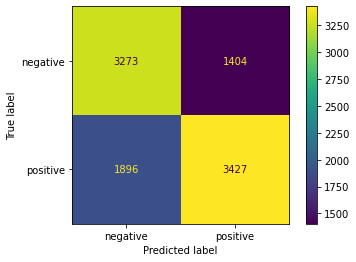

In [3]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pylab as pl

cm = confusion_matrix(df['automated_sentiment'], df['distilbert_sentiment'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()


 *There are a total of 3273 true negatives and 3427 true positives. Hence 6700 sentiments are classified correctly. There are 1404 sentiments which are actually negative but predicted positive. There are 1896 sentiments which are actually positive but predicted negative. Hence there are a total of 3300 misclassifications.*

**Calculate the number of misclassifications for the roBERTa model**

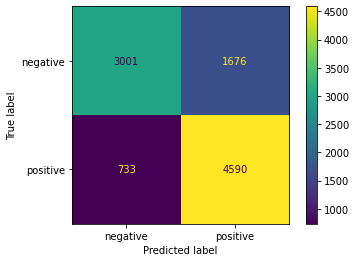

In [4]:
cm = confusion_matrix(df['automated_sentiment'], df['roberta_sentiment'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()

*There are a total of 3001 true negatives and 4590 true positives. Hence 7591 sentiments are classified correctly. There are 1676 sentiments which are actually negative but predicted positive. There are 733 sentiments which are actually positive but predicted negative. Hence there are a total of 2409 misclassifications.*

####
*From the above two comparisons we can see that the roBERTa model performs definitely better in predicting the sentiment.* ####

**Calculate the number of misclassifications for the Finbert model**

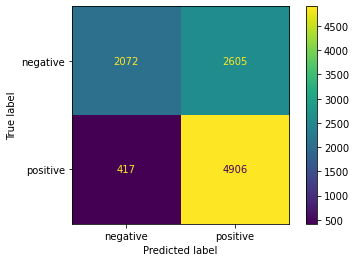

In [5]:
cm = confusion_matrix(df['automated_sentiment'], df['finbert_sentiment_new'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()

There are a total of 2072 true negatives and 4906 true positives. Hence 6978 sentiments are classified correctly. There are 2605 sentiments which are actually negative but predicted positive. There are 416 sentiments which are actually positive but predicted negative. Hence there are a total of 3022 misclassifications.

**Find number of records which are predicted the same in both the models(Distilbert and Roberta): **

In [6]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']):    
    count+=1
print(count)

7303


A total of 7303 records are classified correctly by both the models. 

**Find number of records which are predicted the same in models like Distilbert and Roberta and equal to the True automated sentiment (Ground truth) **

In [7]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']) and (row['automated_sentiment'] == row['distilbert_sentiment']) :    
    count+=1
print(count)

5797


*A total of 5797 records are predicted correctly as the ground truth in the Distilbert and Roberta model.*

 **Find records which are predicted the same in all three models **


In [8]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']) and (row['roberta_sentiment'] == row['finbert_sentiment_new']):    
    count+=1
print(count)

5886


*A total of only 5886 records match in all the three models. *


Now, let's have a look at where the three models agree to the Ground truth:** 

In [19]:
count=0
title = []
sentiment = []

for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']) and (row['roberta_sentiment'] == row['finbert_sentiment_new'] and (row['finbert_sentiment_new'] == row['automated_sentiment'])):    
    count+=1
    title.append(row['title'])
    sentiment.append(row['automated_sentiment'])

print(count)
data = {'title': title,' sentiment' : sentiment}
new_df= pd.DataFrame(data)
new_df.to_excel("/content/drive/MyDrive/Equintel/agreed_dataset.xlsx")


4836


Hence we see a total of 4836 records which have the same predicted values by the three models. 

**Calculation of Performance metrics**

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**Distilbert Model:** 

In [11]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('F1 score: %f' % f1)

Accuracy: 0.670000
Precision: 0.709377
Recall: 0.643810
F1 score: 0.675005


**roBERTa Model:** 

In [12]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['automated_sentiment'], df['roberta_sentiment'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df['automated_sentiment'], df['roberta_sentiment'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df['automated_sentiment'], df['roberta_sentiment'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['automated_sentiment'], df['roberta_sentiment'])
print('F1 score: %f' % f1)

Accuracy: 0.759100
Precision: 0.732525
Recall: 0.862296
F1 score: 0.792130


**Finbert Model:**

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('F1 score: %f' % f1)

Accuracy: 0.684300
Precision: 0.649714
Recall: 0.902701
F1 score: 0.755593
